In [1]:
import statsmodels.tsa.api
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('test_13_3.csv')

In [3]:
print(df.head())
df.tail()

      time   data
0  1965-07  27418
1  1965-08  30592
2  1965-09  23910
3  1965-10  25509
4  1965-11  27003


,time,data
335,1993-06,1079498
336,1993-07,1095091
337,1993-08,1008925
338,1993-09,967118
339,1993-10,1127715


In [4]:
df.shape

(340, 2)

In [5]:
df.dtypes

time    object
data     int64
dtype: object

In [4]:
df['time'] = pd.to_datetime(df['time'])
df.head()

,time,data
0,1965-07-01,27418
1,1965-08-01,30592
2,1965-09-01,23910
3,1965-10-01,25509
4,1965-11-01,27003


In [7]:
df['time'] = pd.to_datetime(df['time'])
df.head()

,time,data
0,1965-07-01,27418
1,1965-08-01,30592
2,1965-09-01,23910
3,1965-10-01,25509
4,1965-11-01,27003


In [5]:
df.set_index('time',inplace=True)

In [6]:
df.head()

,data
time,
1965-07-01,27418
1965-08-01,30592
1965-09-01,23910
1965-10-01,25509
1965-11-01,27003


<AxesSubplot:xlabel='time'>

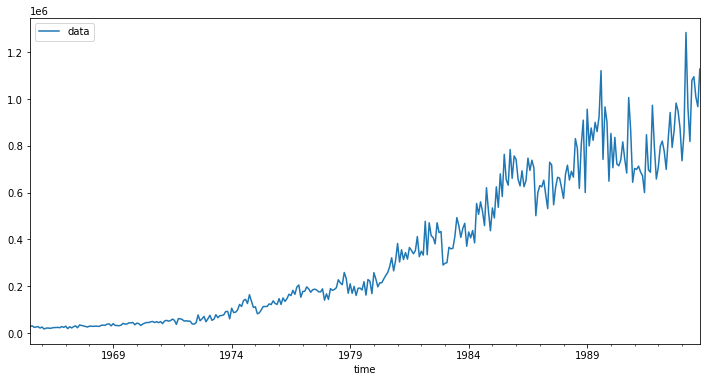

In [7]:
df.plot(figsize=(12,6))

In fit1, we explicitly provide the model with the smoothing parameter α=0.2

In fit2, we choose an α=0.6

In fit3, we use the auto optimization that allow statsmodels to automatically find an optimized value for us. This is the recommended approach.

In [8]:
df.tail()

,data
time,
1993-06-01,1079498
1993-07-01,1095091
1993-08-01,1008925
1993-09-01,967118
1993-10-01,1127715


C:\Users\Amrita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Amrita\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


1993-11-01    1.009678e+06
1993-12-01    1.009678e+06
1994-01-01    1.009678e+06
1994-02-01    1.009678e+06
1994-03-01    1.009678e+06
1994-04-01    1.009678e+06
1994-05-01    1.009678e+06
1994-06-01    1.009678e+06
1994-07-01    1.009678e+06
1994-08-01    1.009678e+06
1994-09-01    1.009678e+06
1994-10-01    1.009678e+06
Freq: MS, Name: alpha = 0.2, dtype: float64


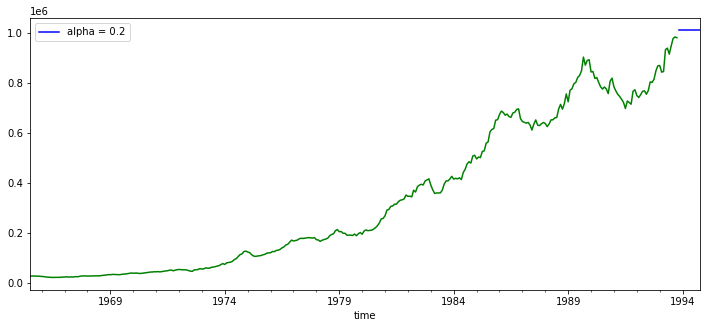

In [11]:
fit1 = SimpleExpSmoothing(df['data']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename('alpha = 0.2')
print (fcast1)
# plot
fcast1.plot( color='blue', legend=True,figsize=(12,5))
fit1.fittedvalues.plot(color='green')
plt.show()

1993-11-01    1.085010e+06
1993-12-01    1.085010e+06
1994-01-01    1.085010e+06
1994-02-01    1.085010e+06
1994-03-01    1.085010e+06
1994-04-01    1.085010e+06
1994-05-01    1.085010e+06
1994-06-01    1.085010e+06
1994-07-01    1.085010e+06
1994-08-01    1.085010e+06
1994-09-01    1.085010e+06
1994-10-01    1.085010e+06
Freq: MS, Name: alpha=0.7, dtype: float64


C:\Users\Amrita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Amrita\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:xlabel='time'>

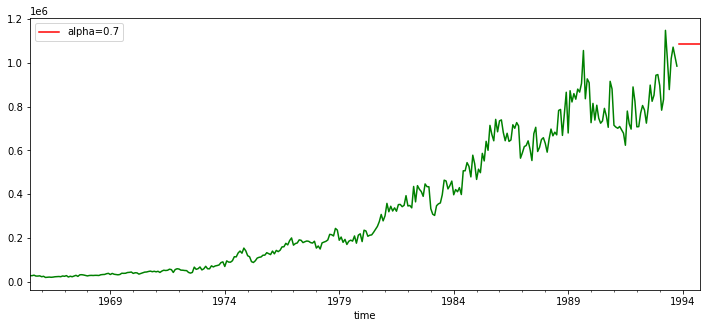

In [12]:
fit2 = SimpleExpSmoothing(df['data']).fit(smoothing_level=0.7,optimized=False)
fcast2 = fit2.forecast(12).rename('alpha=0.7')
print(fcast2)
# plot
fcast2.plot(color='red', legend=True,figsize=(12,5))
fit2.fittedvalues.plot(color='green')

1993-11-01    1.034583e+06
1993-12-01    1.034583e+06
1994-01-01    1.034583e+06
1994-02-01    1.034583e+06
1994-03-01    1.034583e+06
1994-04-01    1.034583e+06
1994-05-01    1.034583e+06
1994-06-01    1.034583e+06
1994-07-01    1.034583e+06
1994-08-01    1.034583e+06
1994-09-01    1.034583e+06
1994-10-01    1.034583e+06
Freq: MS, Name: alpha=0.29283726406759675, dtype: float64


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


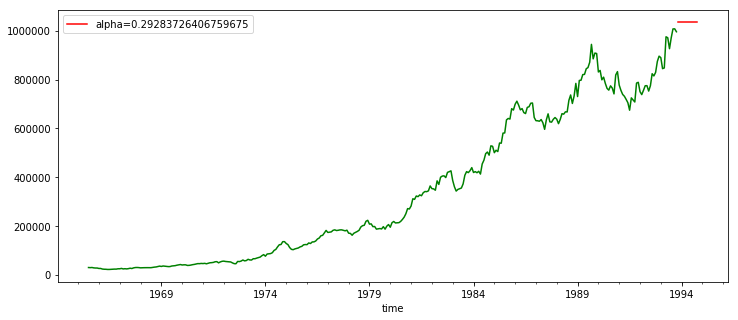

In [12]:
fit3 = SimpleExpSmoothing(df['data']).fit(optimized=True)
fcast3 = fit3.forecast(12).rename('alpha=%s'%fit3.model.params['smoothing_level'])
print(fcast3)
# plot
fcast3.plot(color='red', legend=True,figsize=(12,5))
fit3.fittedvalues.plot(color='green')

In [13]:
fit3.model.params['smoothing_level']

0.29283726406759675

In fit1, we explicitly provide the model with the smoothing parameter α=0.8, β*=0.2.


In fit3, we use a damped version of the Holt’s additive model but allow the dampening parameter ϕ to be optimized while fixing the values for α=0.8, β*=0.2.

1993-11-01    1.075474e+06
1993-12-01    1.089004e+06
1994-01-01    1.102533e+06
1994-02-01    1.116062e+06
1994-03-01    1.129591e+06
1994-04-01    1.143120e+06
1994-05-01    1.156650e+06
1994-06-01    1.170179e+06
1994-07-01    1.183708e+06
1994-08-01    1.197237e+06
1994-09-01    1.210767e+06
1994-10-01    1.224296e+06
Freq: MS, Name: Holt's linear trend, dtype: float64


C:\Users\Amrita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Amrita\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-14-ab85e0ad46a5>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(df['data']).fit(smoothing_level=0.2, smoothing_slope= 0.9, optimized=False)


<AxesSubplot:xlabel='time'>

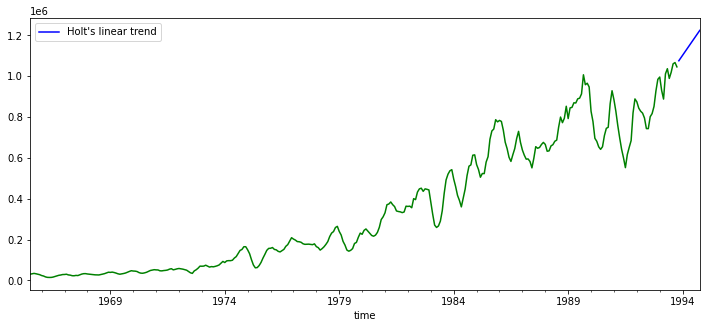

In [14]:
fit1 = Holt(df['data']).fit(smoothing_level=0.2, smoothing_slope= 0.9, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")
fit1.fittedvalues.plot(color='green')
print(fcast1)
fcast1.plot(color='blue', legend=True,figsize=(12,5))

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1993-11-01    1.039262e+06
1993-12-01    1.042207e+06
1994-01-01    1.045151e+06
1994-02-01    1.048096e+06
1994-03-01    1.051040e+06
1994-04-01    1.053985e+06
1994-05-01    1.056929e+06
1994-06-01    1.059874e+06
1994-07-01    1.062819e+06
1994-08-01    1.065763e+06
1994-09-01    1.068708e+06
1994-10-01    1.071652e+06
1994-11-01    1.074597e+06
1994-12-01    1.077541e+06
1995-01-01    1.080486e+06
1995-02-01    1.083430e+06
1995-03-01    1.086375e+06
1995-04-01    1.089319e+06
1995-05-01    1.092264e+06
1995-06-01    1.095208e+06
1995-07-01    1.098153e+06
1995-08-01    1.101097e+06
1995-09-01    1.104042e+06
1995-10-01    1.106986e+06
1995-11-01    1.109931e+06
1995-12-01    1.112875e+06
1996-01-01    1.115820e+06
1996-02-01    1.118764e+06
1996-03-01    1.121709e+06
1996-04-01    1.124654e+06
1996-05-01    1.127598e+06
1996-06-01    1.130543e+06
1996-07-01    1.133487e+06
1996-08-01    1.136432e+06
1996-09-01    1.139376e+06
1996-10-01    1.142321e+06
Freq: MS, Name: Holt's linea

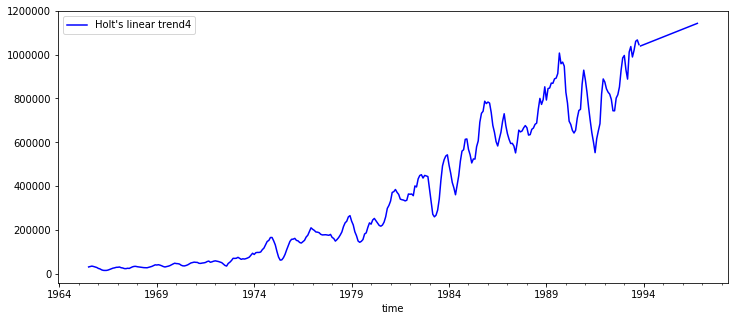

In [15]:
fit4 = Holt(df['data']).fit(optimized=True)
fcast1 = fit4.forecast(36).rename("Holt's linear trend4")
print(fcast1)
fit1.fittedvalues.plot(color='blue')
fcast1.plot(color='blue', legend=True,figsize=(12,5))

In [16]:
fit4.model.params

{'smoothing_level': 0.26202304806600646,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 25435.702155600502,
 'initial_slope': 2944.5225257145453,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

1993-11-01    1.161678e+06
1993-12-01    1.235973e+06
1994-01-01    1.309526e+06
1994-02-01    1.382343e+06
1994-03-01    1.454431e+06
1994-04-01    1.525799e+06
1994-05-01    1.596453e+06
1994-06-01    1.666400e+06
1994-07-01    1.735649e+06
1994-08-01    1.804204e+06
1994-09-01    1.872074e+06
1994-10-01    1.939265e+06
Freq: MS, Name: Additive damped trend, dtype: float64


<ipython-input-15-19758bcc57f2>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit3 = Holt(df['data'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.8)
C:\Users\Amrita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Amrita\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-15-19758bcc57f2>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit3 = Holt(df['data'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.8)
C:\Users\Amrita\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:xlabel='time'>

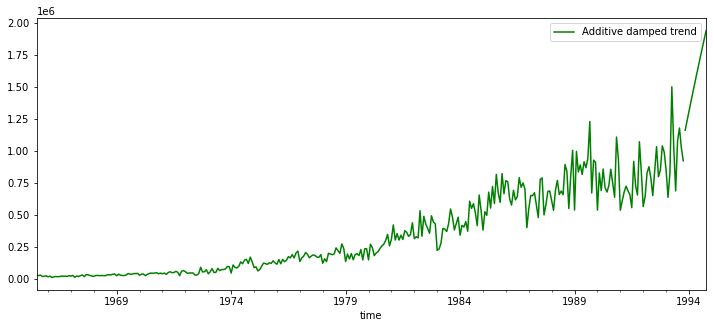

In [15]:
fit3 = Holt(df['data'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.8)
fcast3 = fit3.forecast(12).rename("Additive damped trend")
print(fcast3)
fit3.fittedvalues.plot(color='green')
fcast3.plot(color='green', legend=True,figsize=(12,5))

C:\Users\Amrita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Amrita\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-16-2d1444d069e7>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = ExponentialSmoothing(df['data'], seasonal_periods=12, trend='add', seasonal='add').fit(smoothing_level=.2, smoothing_slope=.15, smoothing_seasonal=.1)
C:\Users\Amrita\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1993-11-01    1.089073e+06
1993-12-01    1.003482e+06
1994-01-01    1.067594e+06
1994-02-01    1.073559e+06
1994-03-01    1.165924e+06
1994-04-01    1.099555e+06
1994-05-01    1.108720e+06
1994-06-01    1.162211e+06
1994-07-01    1.242839e+06
1994-08-01    1.197097e+06
1994-09-01    1.169618e+06
1994-10-01    1.303792e+06
Freq: MS, dtype: float64


<AxesSubplot:xlabel='time'>

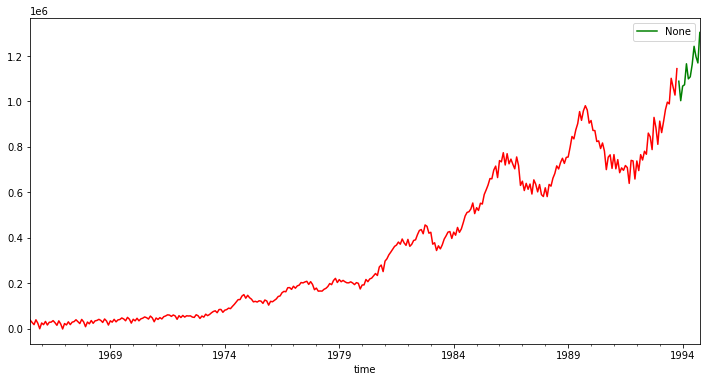

In [16]:
fit1 = ExponentialSmoothing(df['data'], seasonal_periods=12, trend='add', seasonal='add').fit(smoothing_level=.2, smoothing_slope=.15, smoothing_seasonal=.1)
#print(fit1)
fit1.fittedvalues.plot(color='red')
data= fit1.forecast(12)
print(data)
data.plot(color='green', legend=True,figsize=(12,6))


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


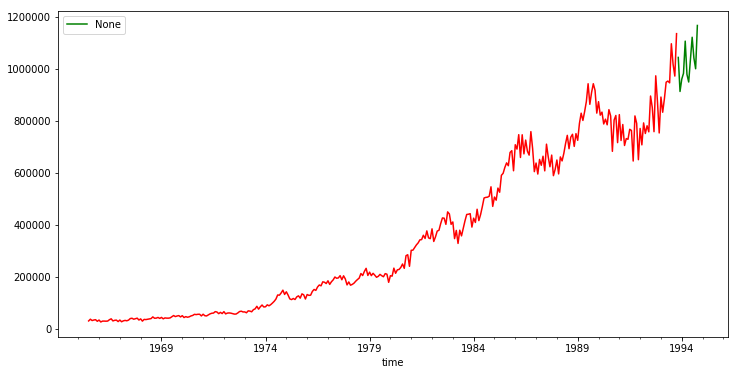

In [19]:
fit1 = ExponentialSmoothing(df['data'], seasonal_periods=12, trend='add', seasonal='add').fit(optimized=True)
fit1.fittedvalues.plot(color='red')
fit1.forecast(12).plot(color='green', legend=True,figsize=(12,6))